# Assignment 1  

For the exercises below you can use the numpy and scipy libraries.

## Problem 1: Simulation (20 points)

Review any of the probability theory links [provided in your course site](https://pantelis.github.io/artificial-intelligence/aiml-common/lectures/ml-math/probability/index.html). The exercise refers to Example 6.6 of the  [Math for ML book](https://mml-book.github.io/book/mml-book.pdf).

### Problem 1A (15 points)

Simulate (sample from) the bivariate normal distribution with the shown parameters obtaining a plot similar to Figure 6.8b that shows the simulation result from a different bivariate Gaussian distribution.  You can generate $m=200$ samples/points (10 points)

### Problem 1B (5 points)

Plot the contours of the bivariate Gaussian distribution and the simulated points in the same plot. (5 points)

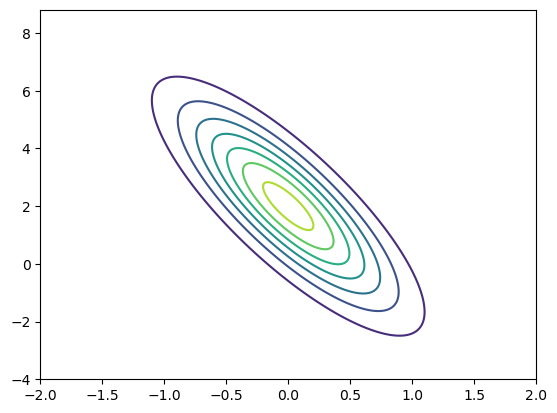

In [17]:
# Insert your answer here and fee free to add markdown cells as needed
# Problem 1A
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
import numpy as np

mean = np.array([0, 2])
cov = np.array([[0.3, -1], [-1, 5]])
# generate the samples with size of 200
samples = np.random.multivariate_normal(mean, cov, size=200)

#Problem 1B

# create the x and y axis
x = np.linspace(-2, 2, 200)
y = np.linspace(-4, 8, 200)
# create the meshgrid
X, Y = np.meshgrid(x, y)    
# display samples
plt.scatter(samples[:,0],samples[:,1], alpha=0)
# stack to create the pdf
pos = np.dstack((X,Y))
rv = multivariate_normal(mean, cov)
z = rv.pdf(pos)
# plot the contour
plt.contour(x,y,z)
plt.show()

## Problem 2: Projection (20 points)

You may want to review these [linear algebra](https://www.youtube.com/playlist?list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab) videos or the [other linear algebra links](https://pantelis.github.io/artificial-intelligence/aiml-common/lectures/ml-math/linear-algebra/index.html) provided in your course site.

Simulate a 3-dimensional (3d) Gaussian random vector with the following covariance matrix.

$$
\begin{bmatrix}
4 & 2 & 1 \\
2 & 3 & 1.5 \\
1 & 1.5 & 2 \\
\end{bmatrix}
$$

Using the Singular Value Decomposition (SVD) compute the projection of the simulated vectors onto the subspace spanned by the first two principal components.

### Problem 2A (5 points)

What determines the principal components ?

### Problem 2B (5 points)

What determines the positive or negative correlations between the components ?

### Problem 2C (10 points)

Plot the projected vectors and show whether or not the projection agrees with the positive or negative correlations of the original matrix.



PC: [-11.42046704 -16.8279607  -32.78222755]
Correlation: 
 [[ 1.          0.89255727  0.57381714 -0.96169237]
 [ 0.89255727  1.          0.14285714 -0.98198051]
 [ 0.57381714  0.14285714  1.         -0.32732684]
 [-0.96169237 -0.98198051 -0.32732684  1.        ]]


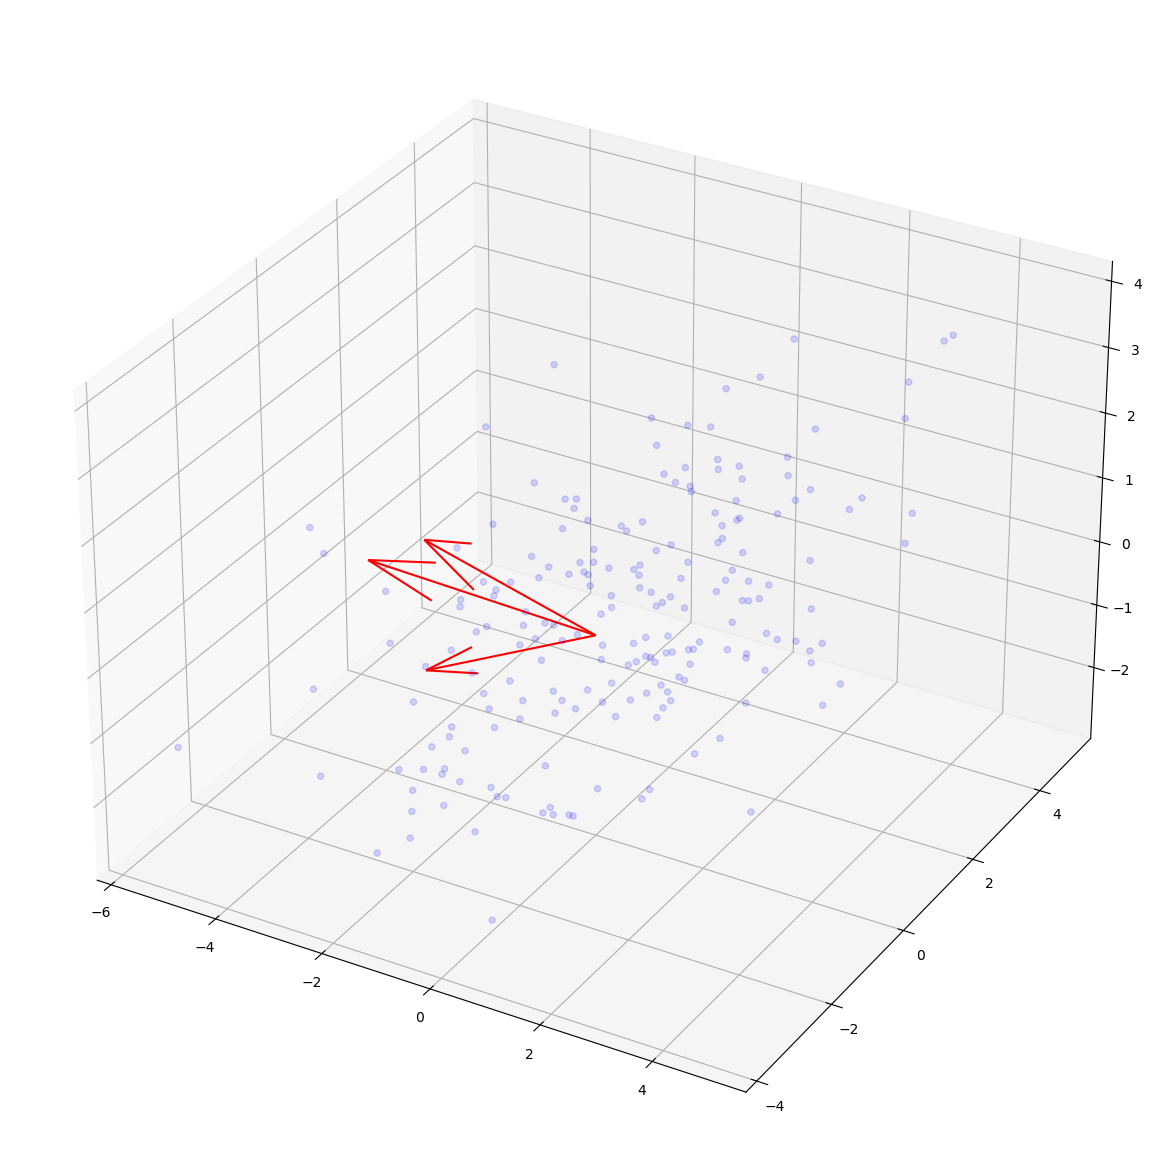

In [21]:
# Insert your answer here and fee free to add markdown cells as needed

#2A
# create the array
three_dim = np.array([[4, 2, 1], [2,3,1.5], [1, 1.5, 2]])
three_dim
mean2 = [0,0,0]
samples = np.random.multivariate_normal(mean2, three_dim, size=200) 
U, S, V = np.linalg.svd(samples)
pc = np.dot(S,V)
print("PC:",pc)
corr = np.corrcoef(pc.T, three_dim.T)
print("Correlation: \n", corr)
proj_w = np.dot(three_dim, V.T)

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')
ax.quiver(0, 0, 0, proj_w[:,0], proj_w[:,1], proj_w[:,2], color="red")
ax.scatter(samples[:,0], samples[:,1], samples[:,2], color="blue", alpha=.15)
plt.show()
'''i think they agree with the correlation since
the correlation is the same as the covariance matrix
and the covariance matrix is the same as the projection
matrix. The projection matrix is the same as the
eigenvectors of the covariance matrix. So they are
all the same.'''
